In [1]:
profs = ['zaher', 'sadve', 'vadve', 'agha', 'n-ahuja', 'ramn', 'alawini', 'namato', 'maa', 'angrave', 'bpbailey', 'arindamb', 'batesa', 'mattox', 'spbhat2', 'clblake', 'nikita', 'tbretl', 'bigdog', 'caesar', 'rhc', 'chackoge', 'challen', 'tmc', 'karthe', 'eshwar', 'kcchang', 'chekuri', 'dchen', 'wendycho', 'girishc', 'camillec', 'bcosman', 'katcun', 'rcunnin2', 'davis68', 'mrebl', 'delgosha', 'jdiesner', 'minhdo', 'krdc', 'dullerud', 'melkebir', 'jeffe', 'gcevans', 'waf', 'fischerp', 'mfleck', 'cwfletch', 'miforbes', 'daf', 'friedman', 'aganesn2', 'jugal', 'ygertner', 'ghose', 'girju', 'pbg', 'mgolpar', 'wgropp', 'kaiyug', 'lgui', 'cgunter', 'egunter', 'indy', 'saurabhg', 'hanj', 'harandi', 'sariel', 'jch', 'jhasegaw', 'kkhauser', 'jingrui', 'daheath', 'heath', 'glherman', 'juliahmr', 'dhoiem', 'yihchun', 'jianh', 'yunhuang', 'w-hwu', 'rkiyer', 'reyhaneh', 'shj', 'hengji', 'nanjiang', 'kale', 'kamin', 'ddkang', 'kkarahal', 'dskatz', 'dakshita', 'nskim', 'kindrtnk', 'kirlik', 'andreask', 'wtkramer', 'rhk', 'emer-kuck', 'rakeshk', 'ranjitha', 'hclane', 'lavalle', 'lawrie', 'slazebni', 'klevchen', 'colleenl', 'lbo', 'yunzhuli', 'hl314', 'j-liu1', 'ludaesch', 'lumetta', 'marinov', 'mchenry', 'rutameht', 'charithm', 'meseguer', 'mickunas', 'milenkov', 'soc1024', 'misailo', 'mitras', 'radhikam', 'moralesa', 'klara', 'ymn', 'dmnicol', 'mnowak1', 'idoia', 'lukeo', 'padua', 'yongjoo', 'madhu', 'sjp', 'haopeng', 'jianpeng', 'pitt', 'maxim', 'rwerger', 'jrehg', 'j-reid1', 'reingold', 'renling', 'tringer', 'generobi', 'grosu', 'croy', 'schatz', 'aschwing', 'lrs', 'shaffer1', 'mfsilva', 'ggnds', 'msinha', 'skeel', 'paris', 'snir', 'bradsol', 'solomon2', 'elahe', 'rsrikant', 'ssterman', 'jimeng', 'hs1', 'rubyt', 'mjt', 'htong', 'torrella', 'twidale', 'luthert', 'varshney', 'deepakv', 'pramodv', 'vmahesh', 'gangw', 'shaowen', 'shenlong', 'yvw', 'yxw', 'warnow', 'tiffani', 'winslett', 'mwoodley', 'arwool', 'tyxu', 'yuanwz', 'czhai', 'lingming', 'hanzhao', 'zilles']
# test
#profs = ['jeffe', 'vadve']

In [3]:
import requests
from bs4 import BeautifulSoup

# specify the URL of the webpage to be scraped
for prof in profs:
    url = f"https://cs.illinois.edu/about/people/all-faculty/{prof}"

    # specify the list of h2 headers to search for and the corresponding text labels
    h2_headers = [("Education", "Education"), ("Academic Positions", "Academic Positions"), ("Research Interests", "Research Interests")]

    # send a GET request to the webpage
    response = requests.get(url)

    # parse the HTML content of the webpage using Beautiful Soup
    soup = BeautifulSoup(response.content, 'html.parser')

    # extract the name, department, and university from the webpage title
    title = soup.head.find('title')
    if title:
        title_parts = title.text.strip().split(' | ')
        name = title_parts[0]
        department = title_parts[1]
        university = title_parts[2]
    else:
        print('No title tag found')
        name = ''
        department = ''
        university = ''

    # extract the email from the webpage
    email = soup.find('div', class_='email')
    if email:
        email = email.a.text.strip()
    else:
        email = ''

    # create a string to hold the information of the new person
    person_info = f"Name: {name}\nDepartment: {department}\nUniversity: {university}\nEmail: {email}\n\n"
    for header_text, label in h2_headers:
        # find the h2 header with the specified text
        h2 = soup.find('h2', text=header_text)
        if h2:
            # find the ul tag after the h2 header
            ul = h2.find_next('ul')
            if ul:
                # loop through the li tags in the ul tag and add them to the person_info string
                for li in ul.find_all('li'):
                    person_info += f"{label}: {li.text.strip()}\n"
            else:
                person_info += f"{label}: Not Found\n"
                print('No ul tag found after header:', header_text)
        else:
            person_info += f"{label}: Not Found\n"
            print('Header not found:', header_text)

    # write the person_info string to a text file in append mode
    with open('people.txt', 'a') as file:
        file.write(person_info + "\n<----------------------------------------------------------------->\n")


Header not found: Academic Positions
Header not found: Academic Positions
Header not found: Research Interests
Header not found: Research Interests
Header not found: Academic Positions
Header not found: Academic Positions


KeyboardInterrupt: 

In [11]:
prof = ['mikaelb']

In [5]:
from bs4 import BeautifulSoup

# specify the URL of the webpage to be scraped
for prof in profs:
    url = f"https://cs.illinois.edu/about/people/all-faculty/{prof}"

    # specify the list of h2 headers to search for and the corresponding text labels
    h2_headers = [("Education", "Education"), ("Academic Positions", "Academic Positions"), ("Research Interests", "Research Interests")]

    try:
        # send a GET request to the webpage
        response = requests.get(url)
    except:
        print('Did not find:', url)
        continue

    # parse the HTML content of the webpage using Beautiful Soup
    soup = BeautifulSoup(response.content, 'html.parser')

    # extract the name, department, and university from the webpage title
    title = soup.head.find('title')
    if title:
        title_parts = title.text.strip().split(' | ')
        name = title_parts[0]
        department = title_parts[1]
        university = title_parts[2]
    else:
        print('No title tag found')
        name = ''
        department = ''
        university = ''

    # extract the email and phone number from the webpage
    email_div = soup.find('div', class_='email')
    email = email_div.a.text if email_div else ''
    phone_div = soup.find('div', class_='phone')
    phone = phone_div.text.strip() if phone_div else ''
    office_div = soup.find('div', class_='office')
    office = office_div.text.strip() if office_div else ''

    # create a string to hold the information of the new person
    person_info = f"Name: {name}\nDepartment: {department}\nUniversity: {university}\nEmail: {email}\nPhone: {phone}\nOffice: {office}\n\n"
    for header_text, label in h2_headers:
        # find the h2 header with the specified text
        h2 = soup.find('h2', text=header_text)
        if h2:
            # find the ul tag after the h2 header
            ul = h2.find_next('ul')
            if ul:
                # loop through the li tags in the ul tag and add them to the person_info string
                for li in ul.find_all('li'):
                    person_info += f"{label}: {li.text.strip()}\n"
            else:
                person_info += f"{label}: Not Found\n"
                print('No ul tag found after header:', header_text)
        else:
            person_info += f"{label}: Not Found\n"
            print('Header not found:', header_text)

    # write the person_info string to a text file in append mode
    with open('people.txt', 'a') as file:
        file.write(person_info + "\n<----------------------------------------------------------------->\n")


Header not found: Academic Positions
Header not found: Academic Positions
Header not found: Research Interests
Header not found: Research Interests
Header not found: Academic Positions
Header not found: Academic Positions
Header not found: Education
Header not found: Academic Positions
Header not found: Education
Header not found: Academic Positions
Header not found: Academic Positions
Header not found: Research Interests
Header not found: Education
Header not found: Academic Positions
Header not found: Research Interests
Header not found: Academic Positions
Header not found: Academic Positions
Header not found: Education
Header not found: Academic Positions
Header not found: Education
Header not found: Academic Positions
Header not found: Research Interests
Header not found: Academic Positions
Header not found: Education
Header not found: Academic Positions
Header not found: Research Interests
Header not found: Academic Positions
Header not found: Academic Positions
Header not found: 

In [7]:
import csv
import requests
from bs4 import BeautifulSoup

# specify the URL of the webpage to be scraped
for prof in profs:
    url = f"https://cs.illinois.edu/about/people/all-faculty/{prof}"

    # specify the list of h2 headers to search for and the corresponding text labels
    h2_headers = [("Education", "Education"), ("Academic Positions", "Academic Positions"), ("Research Interests", "Research Interests")]

    # send a GET request to the webpage
    response = requests.get(url)

    # parse the HTML content of the webpage using Beautiful Soup
    soup = BeautifulSoup(response.content, 'html.parser')

    # extract the name, department, and university from the webpage title
    title = soup.head.find('title')
    if title:
        title_parts = title.text.strip().split(' | ')
        name = title_parts[0]
        department = title_parts[1]
        university = title_parts[2]
    else:
        print('No title tag found')
        name = ''
        department = ''
        university = ''

    # create a list to hold the information of the new person
    person_info = [name, department, university]

    # loop through the h2 headers and add the corresponding information to the list
    for header_text, label in h2_headers:
        # find the h2 header with the specified text
        h2 = soup.find('h2', text=header_text)
        if h2:
            # find the ul tag after the h2 header
            ul = h2.find_next('ul')
            if ul:
                # loop through the li tags in the ul tag and add them to the person_info list
                info_list = []
                for li in ul.find_all('li'):
                    info_list.append(li.text.strip())
                person_info.append('\n'.join(info_list))
            else:
                person_info.append('Not Found')
                print('No ul tag found after header:', header_text)
        else:
            person_info.append('Not Found')
            print('Header not found:', header_text)

    # find the email and add it to the list
    email_div = soup.find('div', {'class': 'email'})
    if email_div:
        email = email_div.a.text
    else:
        email = 'Not Found'
        print('Email not found')
    person_info.append(email)

    # find the phone number and add it to the list
    phone_div = soup.find('div', {'class': 'phone'})
    if phone_div:
        phone = phone_div.text.strip()
    else:
        phone = 'Not Found'
        print('Phone number not found')
    person_info.append(phone)

    # find the office and add it to the list
    office_div = soup.find('div', {'class': 'office'})
    if office_div:
        office = office_div.text.strip()
    else:
        office = 'Not Found'
        print('Office not found')
    person_info.append(office)

    # write the person_info list to a row in the CSV file
    with open('people.csv', 'a', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(person_info)


Header not found: Research Interests


In [8]:
import csv

with open('people.csv', mode='r') as csv_file:
    csv_reader = csv.DictReader(csv_file)
    for row in csv_reader:
        print(row)


{'Jeff Erickson\n': 'Vikram Adve\n', 'Computer Science': 'Computer Science', 'UIUC': 'UIUC', 'Ph.D., Computer Science, University of California, Berkeley, July 1996\nM.S., Information and Computer Science, University of California, Irvine, June 1992\nB.A., Computer Science and Mathematical Sciences (double major), Rice University, May 1987': 'Ph.D. in Computer Science from University of Wisconsin-Madison, 1993.', 'Sohaib and Sara Abbasi Professor, University of Illinois at Urbana-Champaign, 2020-present\nProfessor, University of Illinois at Urbana-Champaign, 2010-present\nAssociate Professor (tenured), University of Illinois at Urbana-Champaign, 2004-2010\nAssistant Professor, University of Illinois at Urbana-Champaign, 1998-2004': 'Professor, Coordinated Science Laboratory, August 2011-present, 0%\nProfessor, Information Trust Institute, August 2011-present, 0%\nProfessor, Computer Science Department, Univ. of Illinois, August 2011-present, 100%', 'Algorithms, data structures, and low

In [18]:
import requests
from bs4 import BeautifulSoup

def extract_title(soup):
    title = soup.head.find('title')
    if title:
        title_parts = title.text.strip().split(' | ')
        return title_parts[0], title_parts[1], title_parts[2]
    else:
        return '', '', ''

def extract_contact_info(soup):
    email_div = soup.find('div', class_='email')
    email = email_div.a.text if email_div else ''
    phone_div = soup.find('div', class_='phone')
    phone = phone_div.text.strip() if phone_div else ''
    office_div = soup.find('div', class_='office')
    office = office_div.text.strip() if office_div else ''
    return email, phone, office

def extract_list_info(soup, header_text, label):
    h2 = soup.find('h2', text=header_text)
    if h2:
        ul = h2.find_next('ul')
        if ul:
            return [f"{label}: {li.text.strip()}" for li in ul.find_all('li')]
        else:
            return [f"{label}: Not Found"]
    else:
        return [f"{label}: Not Found"]

def extract_person_info(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')

    name, department, university = extract_title(soup)
    email, phone, office = extract_contact_info(soup)

    h2_headers = [("Education", "Education"), ("Academic Positions", "Academic Positions"), ("Research Interests", "Research Interests")]
    person_info = [f"Name: {name}", f"Department: {department}", f"University: {university}", f"Email: {email}", f"Phone: {phone}", f"Office: {office}"]

    for header_text, label in h2_headers:
        person_info += extract_list_info(soup, header_text, label)

    return person_info

def write_person_info(person_info):
    with open('people.txt', 'a') as file:
        file.write('\n'.join(person_info) + "\n<----------------------------------------------------------------->\n")

#profs = ['barford', 'zilles', 'lillis', 'aluru', 'fagen', 'mccoy', 'rsantrac', 'atchley', 'wgropp']

for prof in profs:
    url = f"https://cs.illinois.edu/about/people/all-faculty/{prof}"
    person_info = extract_person_info(url)
    write_person_info(person_info)


In [22]:
import requests
from bs4 import BeautifulSoup

def extract_title(soup):
    title = soup.head.find('title')
    if title:
        title_parts = title.text.strip().split(' | ')
        return title_parts[0], title_parts[1], title_parts[2]
    else:
        return None, None, None

def extract_contact_info(soup):
    email_div = soup.find('div', class_='email')
    email = email_div.a.text if email_div else ''
    phone_div = soup.find('div', class_='phone')
    phone = phone_div.text.strip() if phone_div else ''
    office_div = soup.find('div', class_='office')
    office = office_div.text.strip() if office_div else ''
    return email, phone, office

def extract_list_info(soup, header_text, label):
    h2 = soup.find('h2', text=header_text)
    if h2:
        ul = h2.find_next('ul')
        if ul:
            return [f"{label}: {li.text.strip()}" for li in ul.find_all('li')]
        else:
            return [f"{label}: Not Found"]
    else:
        return [f"{label}: Not Found"]

def extract_person_info(url):
    try:
        response = requests.get(url)
        response.raise_for_status()
    except requests.exceptions.RequestException as e:
        print(f"Error fetching {url}: {e}")
        return None

    soup = BeautifulSoup(response.content, 'html.parser')

    name, department, university = extract_title(soup)
    if name is None:
        print(f"Error: Could not extract name from {url}")
        return None

    email, phone, office = extract_contact_info(soup)

    h2_headers = [("Education", "Education"), ("Academic Positions", "Academic Positions"), ("Research Interests", "Research Interests")]
    person_info = [f"Name: {name}", f"Department: {department}", f"University: {university}", f"Email: {email}", f"Phone: {phone}", f"Office: {office}"]

    for header_text, label in h2_headers:
        person_info += extract_list_info(soup, header_text, label)

    return person_info

def write_person_info(person_info):
    with open('people.txt', 'a') as file:
        file.write('\n'.join(person_info) + "\n<----------------------------------------------------------------->\n")


for prof in profs:
    url = f"https://cs.illinois.edu/about/people/all-faculty/{prof}"
    person_info = extract_person_info(url)
    if person_info is not None:
        write_person_info(person_info)


In [23]:
from lxml import etree

# Parse the HTML content
soup = BeautifulSoup(response.content, 'html.parser')
tree = etree.fromstring(str(soup))

# Convert the tree to a string representation
tree_str = etree.tostring(tree, pretty_print=True)


/var/folders/bd/qnw8sx3d3rvfffbjccjjr9l00000gn/T/ipykernel_79626/1014550194.py:48: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix = linkage(dist_matrix, method='ward')


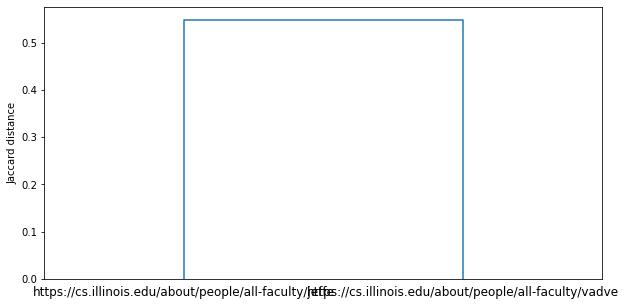

In [26]:
import requests
from bs4 import BeautifulSoup
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Extract DOM tree from HTML page
def extract_dom_tree(url):
    try:
        response = requests.get(url)
        response.raise_for_status()
    except requests.exceptions.RequestException as e:
        print(f"Error fetching {url}: {e}")
        return None

    soup = BeautifulSoup(response.content, 'html.parser')
    return soup

# Compare DOM trees using Jaccard distance
def jaccard_distance(soup1, soup2):
    set1 = set(str(soup1).split())
    set2 = set(str(soup2).split())
    intersection = len(set1 & set2)
    union = len(set1 | set2)
    return 1 - (intersection / union)

# Fetch and extract DOM tree for each URL
urls = [
    "https://cs.illinois.edu/about/people/all-faculty/jeffe",
    "https://cs.illinois.edu/about/people/all-faculty/vadve",
]
dom_trees = []
for url in urls:
    dom_trees.append(extract_dom_tree(url))

# Compute distance matrix
dist_matrix = []
for i in range(len(dom_trees)):
    row = []
    for j in range(len(dom_trees)):
        if i == j:
            row.append(0)
        else:
            distance = jaccard_distance(dom_trees[i], dom_trees[j])
            row.append(distance)
    dist_matrix.append(row)

# Perform hierarchical clustering
linkage_matrix = linkage(dist_matrix, method='ward')

# Plot dendrogram
plt.figure(figsize=(10, 5))
dendrogram(linkage_matrix, labels=urls)
plt.ylabel('Jaccard distance')
plt.show()


In [34]:
import requests
from bs4 import BeautifulSoup
from sklearn.cluster import KMeans

# Function to extract features from a DOM node
def extract_features(node):
    features = []
    features.append(node.name)
    features += [f"{k}={v}" for k, v in node.attrs.items()]
    features.append(node.text.strip())
    return features

# Function to cluster a DOM tree using KMeans
def cluster_dom_tree(root):
    # Extract features from all nodes in the DOM tree
    nodes = [node for node in root.descendants if node.name is not None]
    features = [extract_features(node) for node in nodes]
    # Cluster the features using KMeans
    kmeans = KMeans(n_clusters=3, random_state=0).fit(features)
    # Assign each node to a cluster based on its features
    clusters = kmeans.labels_
    for i, node in enumerate(nodes):
        node['cluster'] = clusters[i]
    return root

# Example usage
url = "https://cs.illinois.edu/about/people/all-faculty/jeffe"
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')
root = cluster_dom_tree(soup)


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (946,) + inhomogeneous part.

In [41]:
import csv
import requests
from bs4 import BeautifulSoup
import nltk
from transformers import pipeline

# specify the URL of the webpage to be scraped
for prof in profs:
    url = f"https://cs.illinois.edu/about/people/all-faculty/{prof}"

    # specify the list of h2 headers to search for and the corresponding text labels

    # send a GET request to the webpage
    response = requests.get(url)

    # parse the HTML content of the webpage using Beautiful Soup
    soup = BeautifulSoup(response.content, 'html.parser')

    # extract the text content of the webpage
    text = soup.text

    # initialize a pipeline to extract named entities using a pre-trained transformer model
    ner_pipeline = pipeline("ner", model="dslim/bert-base-NER", tokenizer="dslim/bert-base-NER")

    # extract named entities from the text
    entities = ner_pipeline(text)

    # search for the Education entity and extract its value
    for entity in entities:
        if entity['entity'] == 'EDUCATION':
            education = entity['word']
            print(f"Education: {education}")
            break

: 

: 

In [2]:
ner_pipeline = pipeline("ner", model="dslim/bert-base-NER", tokenizer="dslim/bert-base-NER")

NameError: name 'pipeline' is not defined

In [2]:
import transformers
from transformers import BertTokenizer#, BertForTokenClassification
#from transformers import pipeline
# initialize a tokenizer and model to extract named entities using BERT
#tokenizer = BertTokenizer.from_pretrained('bert-large-uncased')
#model = BertForTokenClassification.from_pretrained('bert-large-uncased')

# encode the text using the tokenizer
#tokens = tokenizer.encode(text, add_special_tokens=False)

: 

: 